Question #1:
How many tennis players are included in dataset?
Answer: Creating CSV file from Dataset.

In [11]:
import pandas as pd
from glob import glob
import pyarrow.parquet as pq
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

####### PLEASE Make sure to read the comment lines for importing the required data from the dataset!
# !!!!!!!!!!  (READ COMMENT LINES)


# #### Reading required data from Dataset and saving into a csv file.
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"home_team_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# Home_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','height']) for f in file_paths ],ignore_index=True)

# pattern = re.compile(r"away_team_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# away_team_df =pd.concat([pd.read_parquet(f,columns=['match_id','full_name','height']) for f in file_paths ],ignore_index=True)

# All_players=pd.concat([Home_team_df,away_team_df])
# All_players.to_csv('./home_away_players.csv',index=False)

All_players=pd.read_csv('home_away_players-Q1-2.csv')
display(All_players.drop_duplicates().head())
Number_of_Players=pd.concat([All_players['Full_name_Home'],All_players['Full_name_Away']])
Number_of_Players=len(Number_of_Players.dropna().unique())
# Number_of_Players=len(All_players['full_name'].unique())
print(f'The number of players is: {Number_of_Players}')

,match_id,Full_name_Home,Height_Home,Full_name_Away,Height_Away
0,11998445,"Cazaux, Arthur",1.83,"Auger-Aliassime, Felix",1.93
4,11998446,"Lestienne, Constant",1.80,Flavio Cobolli,1.83
8,11998447,"Ćorić, Borna",1.88,"Martinez, Pedro",1.85
12,11998448,"Mmoh, Michael",1.88,"Muller, Alexandre",1.83
13,11998449,"Paire, Benoit",1.96,"Mayot, Harold",1.78


The number of players is: 2651


Question #2: what is the average height of the players?

In [12]:

All_players.drop_duplicates(inplace=True)
All_players

home = All_players[['Full_name_Home', 'Height_Home']].rename(columns={'Full_name_Home': 'Full_name', 'Height_Home': 'Height'})
away = All_players[['Full_name_Away', 'Height_Away']].rename(columns={'Full_name_Away': 'Full_name', 'Height_Away': 'Height'})

# Concatenate vertically
Height_All_players = pd.concat([home, away], ignore_index=True)
display(Height_All_players.dropna())
All_players_height_Ave=Height_All_players['Height'].dropna().mean()
print(f'The Average height of the players is: ' + str(round(All_players_height_Ave,2)) + ' cm')





,Full_name,Height
0,"Cazaux, Arthur",1.83
1,"Lestienne, Constant",1.80
2,"Ćorić, Borna",1.88
3,"Mmoh, Michael",1.88
4,"Paire, Benoit",1.96
...,...,...
28518,"Simonit, Ezequiel",1.75
28519,"Doria, Luciano",1.80
28520,"Soriano Barrera, Adria",1.91
28522,"Taberner, Carlos",1.83


The Average height of the players is: 1.82 cm


Question #3: Which player has the highest number of wins?

In [13]:
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"event_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# df =pd.concat([pd.read_parquet(f,columns=['match_id','winner_code']) for f in file_paths ],ignore_index=True)

# merged=df.merge(All_players, how='inner', on='match_id')

# merged.to_csv('./Winners-Q3.csv',index=False)


Winners=pd.read_csv('./Winners-Q3.csv')
display(Winners)
Wins=Winners['winner'].dropna().value_counts().reset_index()

Wins.columns = ['Player', 'Number_of_Wins']
display(Wins)
print(f'{Wins['Player'][0]} has the most wins, with {Wins['Number_of_Wins'][0]} victories.')

,match_id,Full_name_Home,Height_Home,Full_name_Away,Height_Away,winner_code,winner
0,11998445,"Cazaux, Arthur",1.83,"Auger-Aliassime, Felix",1.93,2.0,"Auger-Aliassime, Felix"
1,11998446,"Lestienne, Constant",1.80,Flavio Cobolli,1.83,2.0,Flavio Cobolli
2,11998447,"Ćorić, Borna",1.88,"Martinez, Pedro",1.85,1.0,"Ćorić, Borna"
3,11998448,"Mmoh, Michael",1.88,"Muller, Alexandre",1.83,1.0,"Mmoh, Michael"
4,11998449,"Paire, Benoit",1.96,"Mayot, Harold",1.78,2.0,"Mayot, Harold"
...,...,...,...,...,...,...,...
15665,12213458,"Gorokhov, Mikhail",NaN,"Simonsson, Fred",1.88,2.0,"Simonsson, Fred"
15666,12213459,"Zhu, Michael",1.75,"Lumsden, Ewen",NaN,1.0,"Zhu, Michael"
15667,12213460,"Ojakaar, Oliver",1.91,NaN,NaN,1.0,"Ojakaar, Oliver"
15668,12213482,"Baldovinetti, Guelfo",NaN,NaN,NaN,1.0,"Baldovinetti, Guelfo"


,Player,Number_of_Wins
0,"Popko, Dmitry",32
1,"Faria, Jaime",26
2,"Chidekh, Clement",26
3,"Helgo, Malene",24
4,"Jianu, Filip Cristian",23
...,...,...
2417,"Schiessl, João Eduardo",1
2418,"Chepelev, Andrey",1
2419,"Ahn, Yu Jin",1
2420,"Braynin, Aleksandr",1


Popko, Dmitry has the most wins, with 32 victories.


Question #4:What is the longest match recorded in terms of duration?

In [ ]:
import pandas as pd
match_file = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project\question4.csv'
match_df = pd.read_csv(match_file)
longest_row = match_df.loc[match_df['total_duration'].idxmax()]
match_id = str(int(longest_row['match_id']))
total_time = int(longest_row['total_duration'])
away_file = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project\away_team_cleaned.csv'
home_file = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project\home_team_cleaned.csv'
away_df = pd.read_csv(away_file)
home_df = pd.read_csv(home_file)
away_player = away_df.loc[away_df['match_id'] == int(match_id), 'full_name'].values
home_player = home_df.loc[home_df['match_id'] == int(match_id), 'full_name'].values
print(f"Longest match ID: {match_id}")
print(f"Total duration: {total_time}")
if away_player.size > 0 and home_player.size > 0:
    print(f"Away player: {away_player[0]}")
    print(f"Home player: {home_player[0]}")
else:
    print("Player names not found for this match ID.")

Question #5:How many sets are typically played in a tennis match?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project\question5_final.csv'
df = pd.read_csv(file_path)
mean_sets = round(df['sets_played'].mean())
print(f"mean number of sets played in tennis match: {mean_sets:.2f}")
set_counts = df['sets_played'].value_counts().sort_index()
filtered_counts = set_counts[set_counts.index.isin([1, 2, 3])]

labels = [f"{int(k)} set" for k in filtered_counts.index]
sizes = filtered_counts.values
colors = ['lightcoral', 'gold', 'mediumseagreen']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('distribution of Sets Played per Match')
plt.axis('equal')
plt.show()

Question #6:Which country has produced the most successful tennis players?

In [ ]:
import pandas as pd
df = pd.read_csv('question6.csv')
country_wins = df.groupby('country')['win_count'].sum().reset_index()
country_wins = country_wins.sort_values(by='win_count', ascending=False)
country_wins.to_csv('question6_country_ranking.csv', index=False)
print("Countries Ranked by Total Match Wins:")
print(country_wins.head())
print("\n\nthe most successful is: \n",country_wins.head(1))

Question #9:Which player has won the most tournaments in a single month?

In [ ]:
import pandas as pd
import numpy as np
import os
data_dir = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project'
files = {
    'February': {
        'event': 'february_event_parquet.csv',
        'home': 'February_home_team_parquet.csv',
        'away': 'february_away_team_parquet.csv'
    },
    'March': {
        'event': 'march_event_parquet.csv',
        'home': 'march_home_team_parquet.csv',
        'away': 'march_away_team_parquet.csv'
    }
}
monthly_win_counts = []
for month, f in files.items():
    events_df = pd.read_csv(os.path.join(data_dir, f['event']), usecols=['match_id', 'winner_code'], dtype=str)
    home_df = pd.read_csv(os.path.join(data_dir, f['home']), usecols=['match_id', 'full_name'], dtype=str)
    away_df = pd.read_csv(os.path.join(data_dir, f['away']), usecols=['match_id', 'full_name'], dtype=str)

    for df in [events_df, home_df, away_df]:
        df['match_id'] = df['match_id'].astype(str).str.strip().str.lower()

    home_df['full_name'] = home_df['full_name'].astype(str).str.strip()
    away_df['full_name'] = away_df['full_name'].astype(str).str.strip()

    events_df = events_df[events_df['winner_code'].notna()]
    events_df = events_df[events_df['winner_code'].str.strip().isin(['1.0', '2.0'])]
    events_df['winner_code'] = events_df['winner_code'].astype(float).astype(int).astype(str)

    events_df = events_df.merge(home_df, on='match_id', how='left', suffixes=('', '_home'))
    events_df = events_df.merge(away_df, on='match_id', how='left', suffixes=('', '_away'))

    events_df['winner_name'] = np.where(
        events_df['winner_code'] == '1',
        events_df['full_name'],
        np.where(events_df['winner_code'] == '2', events_df['full_name_away'], np.nan))
    valid_winners = events_df[events_df['winner_name'].notna() & (events_df['winner_name'] != "NG")]
    win_counts = valid_winners['winner_name'].value_counts().reset_index()
    win_counts.columns = ['full_name', 'win_count']
    win_counts['month'] = month
    monthly_win_counts.append(win_counts)
    if not win_counts.empty:
        top_player = win_counts.iloc[0]
        print(f"\ntop player in {month}: {top_player['full_name']}")
    else:
        print(f"\nno valid winners found in {month}.")
combined_df = pd.concat(monthly_win_counts, ignore_index=True)
total_leaderboard = combined_df.groupby('full_name')['win_count'].sum().reset_index()
total_leaderboard = total_leaderboard.sort_values(by='win_count', ascending=False)

Question #10: Is there a correlation between a player's height and their ranking?

,full_name,country,height,plays,current_rank,gender
0,"Cazaux, Arthur",France,1.83,right-handed,86.0,NaN
1,"Lestienne, Constant",France,1.80,right-handed,99.0,NaN
2,"Ćorić, Borna",Croatia,1.88,right-handed,31.0,NaN
3,"Mmoh, Michael",USA,1.88,right-handed,122.0,NaN
4,"Paire, Benoit",France,1.96,right-handed,110.0,NaN
...,...,...,...,...,...,...
49808,"Doria, Luciano",Argentina,1.80,right-handed,1442.0,M
49809,"Soriano Barrera, Adria",Colombia,1.91,right-handed,465.0,M
49810,"Taberner, Carlos",Spain,1.83,right-handed,358.0,M
49811,"Simonsson, Fred",Sweden,1.88,right-handed,NaN,M


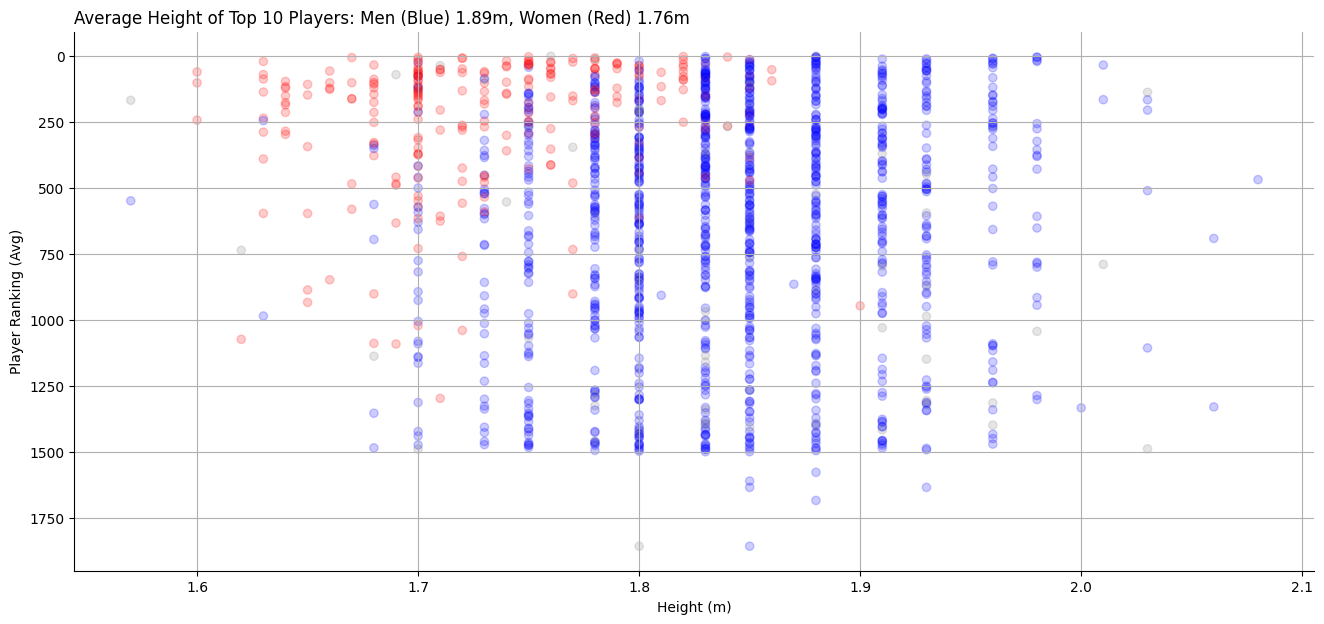

,height,current_rank
count,16.000000,16.000000
mean,1.760000,10.450625
std,0.052789,5.885652
min,1.670000,2.000000
25%,1.720000,5.750000
50%,1.750000,9.225000
75%,1.790000,15.510000
max,1.850000,19.890000


In [14]:
# # file_paths=[]
# # required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# # required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# # pattern = re.compile(r"home_team_\d+\.parquet")
# # file_paths = []

# # for date in required_dates:
# #     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
# #     matched_files = [f for f in all_files if pattern.search(f)]
# #     file_paths.extend(matched_files)

# # used_col=['full_name','country','height','plays','current_rank']
# # Home_team_df =pd.concat([pd.read_parquet(f,columns=used_col) for f in file_paths ],ignore_index=True)

# # file_paths=[]
# # required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# # required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# # pattern = re.compile(r"away_team_\d+\.parquet")
# # file_paths = []

# # for date in required_dates:
# #     all_files = glob(f'./Data/{date}/data/raw/raw_match_parquet/*.parquet')
# #     matched_files = [f for f in all_files if pattern.search(f)]
# #     file_paths.extend(matched_files)

# # used_col=['full_name','gender','country','height','plays','current_rank']
# # Away_team_df =pd.concat([pd.read_parquet(f,columns=used_col) for f in file_paths ],ignore_index=True)


# # players_info_df = pd.concat([Home_team_df, Away_team_df])
# # players_info_df.to_csv('./Players-info-Q10-13-15.csv',index=False)

players_info_df=pd.read_csv('./Players-info-Q10-13-15.csv')
display(players_info_df)

players_height_rank_df=players_info_df[['full_name','gender','height','current_rank']]
# players_height_rank_df.groupby('full_name').mean('current_rank').round(2)

# players_height_rank_df.groupby('full_name')['current_rank'].mean().sort_values()
# players_height_rank_df.loc[players_height_rank_df['full_name']=='Xiao, Zheng Hua']
players_height_avg_rank = (
    players_height_rank_df.groupby('full_name', as_index=False)
      .agg({
          'height': 'first',           # keep first height
          'gender': 'first',           # keep first gender
          'current_rank': 'mean'       # average the rank
      })
      .round(2)
)

players_height_avg_rank['color'] = players_height_avg_rank['gender'].map({
    'M': 'blue',
    'F': 'red'
}).fillna('gray')

fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(x=players_height_avg_rank['height'],
           y=players_height_avg_rank['current_rank'],
           c=players_height_avg_rank['color'],alpha=0.2)
plt.gca().invert_yaxis()
ax.spines[['right','top']].set_visible(False)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Player Ranking (Avg)')
ax.set_title('Average Height of Top 10 Players: Men (Blue) 1.89m, Women (Red) 1.76m',loc='left')
ax.grid(True)
plt.show()

players_height_avg_rank.loc[players_height_avg_rank['height'].isnull()]
Top_20_men=players_height_avg_rank[(players_height_avg_rank['current_rank']<20) & (players_height_avg_rank['gender']=='M')]
Top_20_women=players_height_avg_rank[(players_height_avg_rank['current_rank']<20) & (players_height_avg_rank['gender']=='F')]
Top_20_men.describe()
Top_20_women.describe()

Question #11:What is the average duration of matches?

In [ ]:
import pandas as pd
file_path = r'C:\Users\fatemeh\OneDrive\Desktop\tennis_project\question4_final.csv'
df = pd.read_csv(file_path)
df['total_duration'] = pd.to_numeric(df['total_duration'], errors='coerce')
mean_duration = df['total_duration'].mean()
print(f"average match duration: {mean_duration:.2f}")

Question #13: What is the distribution of left-handed versus right-handed players?

C:\Users\User\AppData\Local\Temp\ipykernel_17036\4202779004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_hand_df.fillna('Not mentioned',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17036\4202779004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_hand_df.drop_duplicates(inplace=True)


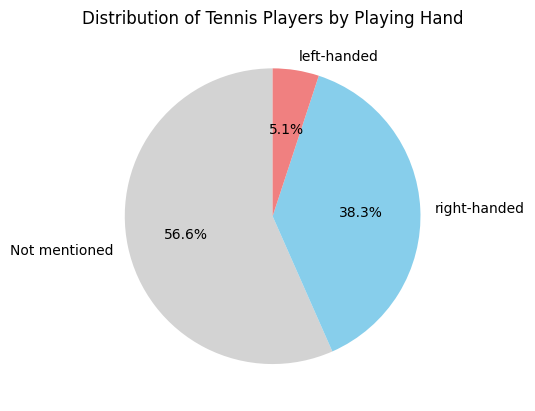

In [15]:
players_info_df=pd.read_csv('./Players-info-Q10-13-15.csv')
players_hand_df=players_info_df[['full_name','plays']]
players_hand_df.fillna('Not mentioned',inplace=True)
players_hand_df.drop_duplicates(inplace=True)
players_hand=players_hand_df['plays'].value_counts(normalize=True).mul(100)
# players_hand.describe()
players_hand
plt.pie(
    players_hand,
    labels=players_hand.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgray', 'skyblue', 'lightcoral']
)
plt.title('Distribution of Tennis Players by Playing Hand')
plt.show()



Q12

In [16]:
# file_paths=[]
# required_dates_initial=pd.date_range('2024-02-01','2024-03-31')
# required_dates = required_dates_initial.strftime('%Y%m%d').tolist()

# pattern = re.compile(r"pbp_\d+\.parquet")
# file_paths = []

# for date in required_dates:
#     all_files = glob(f'./Data/{date}/data/raw/raw_point_by_point_parquet/*.parquet')
#     matched_files = [f for f in all_files if pattern.search(f)]
#     file_paths.extend(matched_files)

# df =pd.concat([pd.read_parquet(f) for f in file_paths ],ignore_index=True)
df.loc[(df['match_id']==11998445) & (df['set_id']==3)]

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11998445,3,13,0,1,0,0,6,5,6,7,1,2
1,11998445,3,13,1,1,1,0,5,6,6,7,1,2
2,11998445,3,13,2,1,2,0,5,6,6,7,1,2
3,11998445,3,13,3,1,3,0,5,1,6,7,1,2
4,11998445,3,13,4,1,4,0,5,1,6,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32217,11998445,3,1,0,15,0,2,1,5,1,0,2,1
32218,11998445,3,1,1,30,0,2,1,5,1,0,2,1
32219,11998445,3,1,2,30,15,0,5,1,1,0,2,1
32220,11998445,3,1,3,30,30,0,5,1,1,0,2,1
